<div style="text-align: center"> <h1>Project Report</h1></div>

***

<div style="text-align: center"> <h2>Predicting Occupation Using Knn-Classifciation</h2></div>

<h4> Introduction </h4>

A person's occupation has a significant impact on their lifestyle and health. Overall well-being can be influenced by a number of work-related factors, including physical demands, irregular hours, sedentary positions, and stress related to one's job. Maintaining a healthy balance between work obligations and personal well-being is essential for a long-lasting and satisfying career. The following suggestion is based on this awareness:

Our work is founded on the concept that different occupational categories may show certain patterns in health and wellness parameters, allowing one to infer a person's career from variables like stress and sleep habits.

Our research aims to determine whether it is possible to predict an individual's occupation using predictor variables from the dataset of interest. 

The Sleep Health and Lifestyle Dataset includes data on gender, age, occupation, sleep metrics, physical activity, stress levels, BMI, cardiovascular health, and sleep disorders. The dataset's columns consist of Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, and Sleep Disorder Status (None, Insomnia, Sleep Apnea). This dataset facilitates in-depth analysis of sleep patterns, lifestyle factors, cardiovascular health, and sleep disorders for a diverse population.
The Hypothesis underlying our study is that distinct occupational categories may exhibit specific patterns in health and wellness factors, making it possible to infer a person's profession based on factors such as sleep and stress levels. 


<h4> Analyzing our Data </h4>

<p>The dataset is fetched from a URL, and column names are renamed accordingly for clarity. The focus is then limited down to a small set of jobs, including doctors, teachers, nurses, engineers, accountants, lawyers, and salespeople, because the remaining occupations lack sufficient data, making training and testing difficult. For further examination, relevant columns such as daily steps, physical activity level, stress level, sleep quality, and sleep length are chosen. For categorical representation, the occupation column is changed to a factor.</p>

<p>This code serves as the first step in data exploration and preprocessing, laying the groundwork for later data analytics and visualisation in the context of understanding the relationship between profession and sleep-related variables.</p>

In [1]:
library(repr)
library(tidyverse)
install.packages("janitor")
install.packages("kknn")
library(janitor)
library(ggplot2)
library(kknn)
library(tidymodels)
library(shiny)


url  <- "https://raw.githubusercontent.com/hmza-exe/DSCI-100-GroupProject_003-12/main/Sleep_health_and_lifestyle_dataset.csv"
occupation_names <- c("Doctor","Teacher" ,"Nurse" ,"Engineer" ,"Accountant", "Lawyer" , "Salesperson")
sleep_health_data <- read_csv(url) |> 
                        rename("person_id" = "Person ID",
                               "gender" = "Gender",
                               "age" = "Age", "occupation" = "Occupation",
                               "sleep_duration" = "Sleep Duration",
                               "quality_of_sleep" = "Quality of Sleep",
                               "physical_activity_level" = "Physical Activity Level",
                               "stress_level" = "Stress Level",
                               "bmi_category" = "BMI Category",
                               "blood_pressure" = "Blood Pressure",
                               "heart_rate" = "Heart Rate",
                               "daily_steps" = "Daily Steps",
                               "sleep_disorder" = "Sleep Disorder")|>
                        select(occupation, daily_steps, physical_activity_level, stress_level, quality_of_sleep, sleep_duration) |>
filter(occupation %in% occupation_names) |>
                        mutate(occupation = as_factor(occupation))
head(sleep_health_data)
tail(sleep_health_data)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Doctor,10000,60,8,6,6.2
Doctor,10000,60,8,6,6.2
Teacher,3500,40,7,6,6.3
Doctor,8000,75,6,7,7.8
Doctor,8000,75,6,7,7.8
Doctor,8000,75,6,7,7.8


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.0
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.1
Nurse,7000,75,3,9,8.1


The script then scales selected features to allow for more effective analysis. The `scale` function is used to normalise daily steps, physical activity level, stress level, sleep quality, and sleep length. The mean is subtracted during the scaling procedure since the centre parameter is set to TRUE. This normalisation is necessary for standardising the variables and bringing them to a similar scale, which is very useful when dealing with machine learning models or performing multivariate analysis. The resulting dataset, `sleep_health_data_scaled`, is then shown, displaying the scaled values for the selected attributes. This phase improves the robustness of subsequent statistical analyses and modelling efforts by guaranteeing that each variable, regardless of its original magnitude, contributes proportionally to the overall analysis.

In [2]:
sleep_health_data_scaled <- sleep_health_data |>
                        mutate(scaled_daily_steps = scale(daily_steps, center = TRUE),
                               scaled_physical_activity = scale(physical_activity_level, center = TRUE),
                                scaled_stress_level = scale(stress_level, center = TRUE),
                              scaled_quality_of_sleep = scale(quality_of_sleep, center = TRUE),
                              scaled_sleep_duration = scale(sleep_duration, center = TRUE)) 
head(sleep_health_data_scaled)
tail(sleep_health_data_scaled)

occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration,scaled_daily_steps,scaled_physical_activity,scaled_stress_level,scaled_quality_of_sleep,scaled_sleep_duration
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Doctor,10000,60,8,6,6.2,1.9730987,0.01599315,1.4960715,-1.1962837,-1.2136877
Doctor,10000,60,8,6,6.2,1.9730987,0.01599315,1.4960715,-1.1962837,-1.2136877
Teacher,3500,40,7,6,6.3,-2.1229125,-0.94359587,0.9321318,-1.1962837,-1.0867593
Doctor,8000,75,6,7,7.8,0.7127875,0.73568492,0.3681921,-0.3207777,0.8171675
Doctor,8000,75,6,7,7.8,0.7127875,0.73568492,0.3681921,-0.3207777,0.8171675
Doctor,8000,75,6,7,7.8,0.7127875,0.73568492,0.3681921,-0.3207777,0.8171675


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration,scaled_daily_steps,scaled_physical_activity,scaled_stress_level,scaled_quality_of_sleep,scaled_sleep_duration
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,"<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>","<dbl[,1]>"
Nurse,7000,75,3,9,8.1,0.08263197,0.7356849,-1.323627,1.430234,1.197953
Nurse,7000,75,3,9,8.1,0.08263197,0.7356849,-1.323627,1.430234,1.197953
Nurse,7000,75,3,9,8.0,0.08263197,0.7356849,-1.323627,1.430234,1.071024
Nurse,7000,75,3,9,8.1,0.08263197,0.7356849,-1.323627,1.430234,1.197953
Nurse,7000,75,3,9,8.1,0.08263197,0.7356849,-1.323627,1.430234,1.197953
Nurse,7000,75,3,9,8.1,0.08263197,0.7356849,-1.323627,1.430234,1.197953


Using the `initial_split` function from the `tidymodels` package, the dataset `sleep_health_data` is split into training and testing sets. The prop parameter is set to 0.75, indicating that 75% of the data will be used for training and the remaining 25% for testing. The stratum parameter is specified as the `occupation` column, which ensures that the split maintains a proportional representation of various vocations in both the training and testing sets. The training and testing functions are then used to obtain training and testing subgroups from the split. The generated datasets, dubbed `sleep_train` and `sleep_test`, represent the partitions of the data selected for model training and evaluation, respectively. 

In [3]:
sleep_health_data_split <- initial_split(sleep_health_data, prop = 0.75, strata = occupation)


sleep_train <- training(sleep_health_data_split)   
sleep_test <- testing(sleep_health_data_split)

head(sleep_train)
head(sleep_test)

occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Accountant,7000,60,4,8,7.2
Accountant,7000,60,4,8,7.2
Accountant,7000,60,4,8,7.1
Accountant,7000,60,4,8,7.2
Accountant,7000,60,4,8,7.2
Accountant,7000,60,4,8,7.2


occupation,daily_steps,physical_activity_level,stress_level,quality_of_sleep,sleep_duration
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Doctor,10000,60,8,6,6.2
Doctor,10000,60,8,6,6.2
Teacher,3500,40,7,6,6.3
Doctor,8000,30,8,6,6.0
Doctor,8000,30,8,6,6.0
Doctor,8000,75,6,7,7.8


To preprocess the training data (`sleep_train`), a recipe is constructed using the tidymodels package. The `recipe` function specifies that the goal variable is 'occupation,' and the '~.' notation indicates that the other variables are predictors. Following that, the `step_scale` and `step_center` functions are used to standardise and centre all predictor variables, guaranteeing that they have a mean of 0 and a normal deviation of 1.

The `nearest_neighbor` function is used to provide a k-nearest neighbours (k-NN) model. The weight function "rectangular" is chosen, and the number of neighbours is set to be adjusted. The model is then configured for classification using the "kknn" engine's `set_engine` and `set_mode` methods.

The `vfold_cv` function is used to generate a stratified 5-fold cross-validation plan (`sleep_vfold`). A tibble (`k_vals`) is also created, which specifies a range of neighbour values from 2 to 9 for tweaking the k-NN model.

Combining the pre-processing recipe (`sleep_recipe`) and the k-NN model specification (`sleep_spec`) creates the workflow. The `tune_grid` function is used to find the best number of neighbours based on cross-validated performance indicators, and the results are collected and saved in the `sleep_results` object.

`ggplot2` is used to extract and visualise the accuracy findings. The accuracy vs the number of neighbours is plotted, offering insight into the model's performance at various k values. This visualisation assists in determining the best k value for the k-NN model.

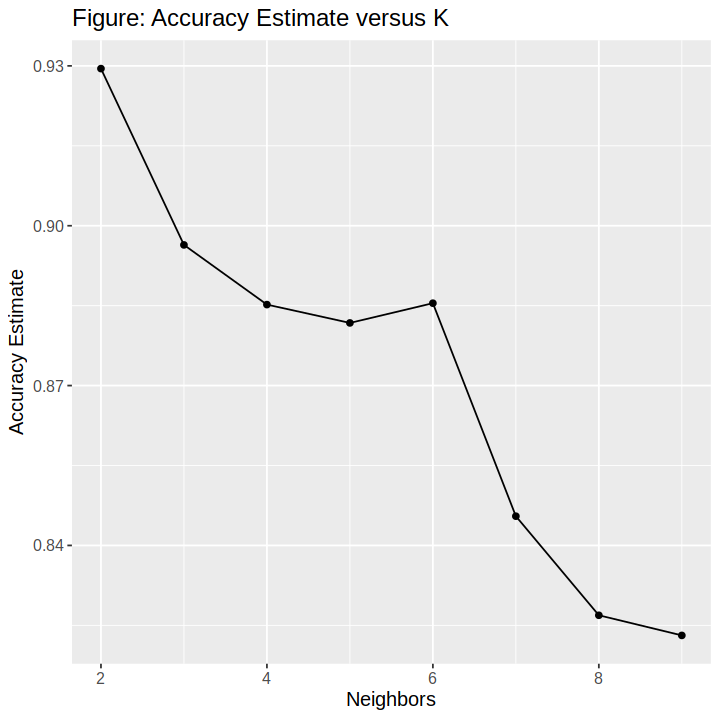

In [4]:
sleep_recipe <- recipe(occupation ~ ., data = sleep_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

sleep_spec <- nearest_neighbor(weight_func = "rectangular", 
                              neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

sleep_vfold <- vfold_cv(sleep_train, v = 5, strata = occupation)
k_vals <- tibble(neighbors = seq(from = 2, to = 9))

sleep_results <- workflow() |>
add_recipe(sleep_recipe) |>
add_model(sleep_spec) |>
tune_grid(resamples = sleep_vfold, grid = k_vals) |>
collect_metrics()

accuracy <- sleep_results |>
filter(.metric == "accuracy")

cross_val_plot <- accuracy |>
ggplot(aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
labs(x = "Neighbors", y = "Accuracy Estimate", title = "Figure: Accuracy Estimate versus K")+
theme(text = element_text(size = 12), plot.caption = element_text(size = 9, hjust=0))


options(repr.plot.height = 6, repr.plot.width = 6)

cross_val_plot 


The training data is used to enhance and fit the k-NN model. The `nearest_neighbor` function is used to specify a rectangular weight function with an optimal k value of 2, which was obtained during the previous tuning phase. The `set_engine` and `set_mode` functions are used to configure the model for categorization. Following that, a workflow is built by combining the previously described preprocessing recipe (`sleep_recipe`) with the revised k-NN model specification (`sleep_spec`). After that, the `fit` function is used to train the model using the training dataset (`sleep_train`). This approach incorporates both data preparation and the chosen k-NN model, offering a thorough framework for training and analysing the model's predictive performance on the sleep health dataset.

In [5]:
sleep_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
set_engine("kknn") |>
set_mode("classification")

sleep_fit <- workflow() |>
add_recipe(sleep_recipe) |>
add_model(sleep_spec) |>
fit(data = sleep_train) 


The previously trained k-NN model (`sleep_fit`) on the testing dataset (`sleep_test`) is used to create predictions for the 'occupation' variable. Predictions are obtained using the `predict` function, which are then coupled with the original testing dataset using `bind_cols`. Following that, the prediction accuracy is assessed by comparing the predicted occupation values (`.pred_class`) to the actual occupation values in the testing dataset. The `metrics` function computes accuracy and filters the output to extract accuracy metrics specifically. The accuracy measure is stored in the `occupation_accuracy` object, and it provides an assessment of the model's effectiveness in predicting occupations based on the supplied features in the testing dataset.

In [6]:
occupation_predictions <- predict(sleep_fit, sleep_test) |>
  bind_cols(sleep_test)

occupation_accuracy <- occupation_predictions |>
  metrics(truth = occupation, estimate = .pred_class) |>
  filter(.metric == "accuracy")

occupation_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8152174


To further analyse the performance of the k-NN model, a confusion matrix for the predicted professions is constructed. The `conf_mat` function is applied to the model's predictions (`occupation_predictions`), which are compared to the true values of the 'occupation' variable in the testing dataset. The `occupation_conf_mat` object that results encapsulates the confusion matrix, providing a full breakdown of the model's predictions, including true positive, true negative, false positive, and false negative counts. This matrix is a useful tool for evaluating the model's classification accuracy and comprehending its performance across various profession categories.

In [7]:
occupation_conf_mat <- occupation_predictions |>
conf_mat(truth = occupation, estimate = .pred_class)

occupation_conf_mat

             Truth
Prediction    Doctor Teacher Nurse Engineer Accountant Lawyer Salesperson
  Doctor          15       0     0        0          0      0           0
  Teacher          0       5     0        0          0      0           0
  Nurse            2       3    17        0          0      1           0
  Engineer         0       0     1       15          0      5           0
  Accountant       0       3     0        2          8      0           0
  Lawyer           0       0     0        0          0      3           0
  Salesperson      0       0     0        0          0      0          12

!# This needs to be checked!

From the confusion matrix above, we observe that our classification model made no mistakes when classifying Doctors, Teachers or Nurses. However our classification model, according to our confusion matrix, had a 76%, 67%, 90% and %84% accuracy classifying Engineers, Accountants, Lawyers, and Salespersons, respectively. We obtain these values by dividing the number of correct predictions by the total number of predictions  

<h4>Discussion</h4>

<p>The confusion matrix displays the results of predicting jobs using the Sleep Health and Lifestyle Dataset based on various health and lifestyle characteristics. The number of times a true occupation (rows) was predicted as a specific profession (columns) is represented by each cell in the matrix.</p>

<h5> What We Found </h5>

<p>We discovered remarkable patterns in the accuracy of predicting jobs based on various health and lifestyle characteristics in our investigation of the Sleep Health and Lifestyle Dataset. Doctors and instructors were consistently correctly predicted, with 15 and 5 right predictions, respectively. Nurses, while usually correctly predicted in 17 cases, had some misclassifications, most notably as engineers, lawyers, and accountants. Engineers were largely correctly predicted (15 times), with occasional misclassifications as nurses and lawyers. Accountants, on the other hand, had eight misclassifications, most notably as lawyers and nurses. In three cases, lawyers were mostly correctly predicted. Salespeople, like doctors and teachers, were mostly correctly predicted, with 12 valid cases. 

These findings shed light on the possible prediction of vocations based on health and lifestyle characteristics, while the observed misclassifications imply that additional refinement and research of the complex interplay between health measures and professional responsibilities is required.</p>

<h5> Were These Findings Expected </h5>

<p>The findings on the accuracy of forecasting jobs based on health and lifestyle characteristics agreed with initial assumptions for doctors, teachers, attorneys, and salespeople. The existence of misclassifications, particularly between nurses and engineers and accountants and lawyers, adds an element of unpredictability. These unanticipated misclassifications suggest that the health and lifestyle profiles of these diverse occupational groups may be comparable. The need to investigate and comprehend these parallels highlights the complexities of the correlations between health measures and professional positions, pushing researchers to delve deeper into the intricate aspects influencing the observed patterns in the prediction model.</p>

<h5> Impact Of Findings </h5>

<p></p>

<h5> Future Questions </h5>

<h4>References</h4>

Tharmalingam, L. (2023, September 18). Sleep health and lifestyle dataset. Kaggle. https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset 